# Butler current data access demo
(*from Jeff Carlings*)

In [1]:
from lsst.daf.butler import Butler

In [2]:
collection = 'LSSTCam/runs/DRP/20250421_20250921/d_2025_11_10/DM-53195'
repo = 'dp2_prep'

butler = Butler(repo, collections=collection)

In [3]:
butler.query_datasets('deep_coadd', limit=1)

[DatasetRef(DatasetType('deep_coadd', {band, skymap, tract, patch}, ExposureF), {band: 'g', skymap: 'lsst_cells_v2', tract: 2078, patch: 80}, run='LSSTCam/runs/DRP/20250421_20250921/d_2025_11_10/DM-53195/20251114T114839Z', id=019a8249-7c5f-71bc-a079-b319f28b98f3)]

In [4]:
ra_cen = 53.076
dec_cen = -28.110

import lsst.sphgeom as sphgeom
region = sphgeom.Region.from_ivoa_pos("CIRCLE 53.076 -28.110 2.0")

In [6]:
band = 'r'
query = "band.name = :band AND " \
        "visit_detector_region.region OVERLAPS POINT(:ra, :dec)"
print(query)

bind_params = {"band": band, "ra": ra_cen, "dec": dec_cen}
print(bind_params)

band.name = :band AND visit_detector_region.region OVERLAPS POINT(:ra, :dec)
{'band': 'r', 'ra': 53.076, 'dec': -28.11}


In [7]:
dataset_refs = butler.query_datasets("source",
                                     bind=bind_params)
print(len(dataset_refs))
# dataset_refs

4478


In [9]:
import lsst.geom as geom
point = geom.SpherePoint(ra_cen*geom.degrees, dec_cen*geom.degrees)
skymap = butler.get("skyMap", skymap="lsst_cells_v2")
tract = skymap.findTract(point).tract_id
patch = skymap.findTract(point).findPatch(point).getSequentialIndex()
print(tract, patch)

5063 15


In [10]:
butler.registry.queryDatasetTypes('*consolidated_map*')

[DatasetType('deepCoadd_dcr_ddec_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_dcr_dra_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_dcr_e1_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_dcr_e2_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_epoch_consolidated_map_max', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_epoch_consolidated_map_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_epoch_consolidated_map_min', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_exposure_time_consolidated_map_sum', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_psf_e1_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_psf_e2_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap),
 DatasetType('deepCoadd_psf_maglim_consolidated_map_weighted_mean', {ban

In [11]:
maglim_refs = butler.query_datasets('deepCoadd_psf_maglim_consolidated_map_weighted_mean')

In [12]:
maglim_refs

[DatasetRef(DatasetType('deepCoadd_psf_maglim_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap), {band: 'g', skymap: 'lsst_cells_v2'}, run='LSSTCam/runs/DRP/20250421_20250921/d_2025_11_10/DM-53195/20251117T192615Z', id=019a9348-b8fa-7e81-95ef-0a6a2ee70f1c),
 DatasetRef(DatasetType('deepCoadd_psf_maglim_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap), {band: 'u', skymap: 'lsst_cells_v2'}, run='LSSTCam/runs/DRP/20250421_20250921/d_2025_11_10/DM-53195/20251117T192615Z', id=019a9348-b8ee-71f9-892a-c1fb40b7256f),
 DatasetRef(DatasetType('deepCoadd_psf_maglim_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap), {band: 'z', skymap: 'lsst_cells_v2'}, run='LSSTCam/runs/DRP/20250421_20250921/d_2025_11_10/DM-53195/20251117T192615Z', id=019a9348-b8f7-7ec8-bb4f-eec318c27cec),
 DatasetRef(DatasetType('deepCoadd_psf_maglim_consolidated_map_weighted_mean', {band, skymap}, HealSparseMap), {band: 'r', skymap: 'lsst_cells_v2'}, run='LSSTCam/runs/DRP/20250421_2025

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skyproj

In [14]:
# maglim_g = butler.get(maglim_refs[0])
maglim_r = butler.get(maglim_refs[3])

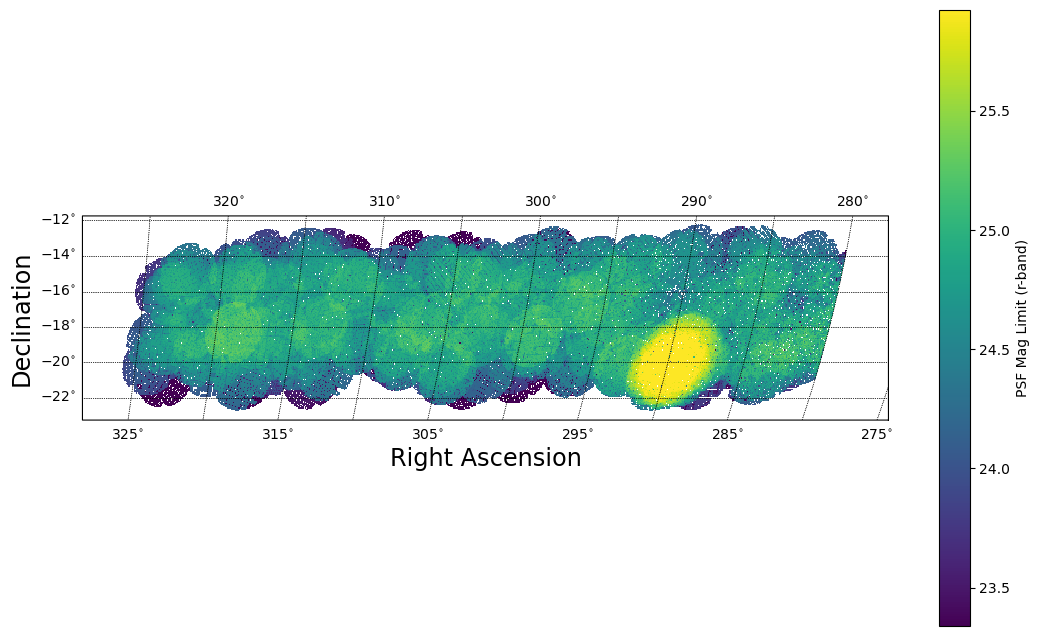

In [15]:
fig, ax = plt.subplots(figsize=(13, 8))
sp = skyproj.McBrydeSkyproj(ax=ax)
sp.draw_hspmap(maglim_r, lon_range=(280, 350))

# plt.xlabel("Right Ascension (deg)")
# plt.ylabel("Declination (deg)")
plt.colorbar(label="PSF Mag Limit (r-band)")
# plt.gca().invert_xaxis()

plt.show()

In [8]:
maglim_g

HealSparseMap: nside_coverage = 32, nside_sparse = 32768, float64, 145060863 valid pixels

In [22]:
objtab = butler.get('object', dataId={'tract':2078, 'skymap':'lsst_cells_v2'},
                    parameters={'columns':['objectId', 'r_psfFlux', 'coord_ra', 'coord_dec']})

In [23]:
objtab

objectId,r_psfFlux,coord_ra,coord_dec
int64,float32,float64,float64
14284717629112527,10579.666,57.26989441487174,-50.94949276895758
14284717629112575,--,57.23617462840264,-50.94081314571144
14284717629112593,493.75928,57.24529176523302,-50.938645406011055
14284717629112598,722.0888,57.240155317489005,-50.93769536963541
14284717629112599,562.0114,57.242711266136354,-50.93751304790522
14284717629112604,622.02246,57.238464415676084,-50.9370451029176
14284717629112614,554.4543,57.2278384720081,-50.935092043869496
14284717629112623,634.5663,57.22318522930814,-50.933628083044425
14284717629112643,2248.8164,57.24083320278263,-50.92941104622486


In [16]:
exptime_refs = butler.query_datasets('deepCoadd_exposure_time_consolidated_map_sum', band='r')

In [17]:
exptime_map = butler.get(exptime_refs[0])

In [18]:
# exptime_values = exptime_map.get_values_pos(x, y)

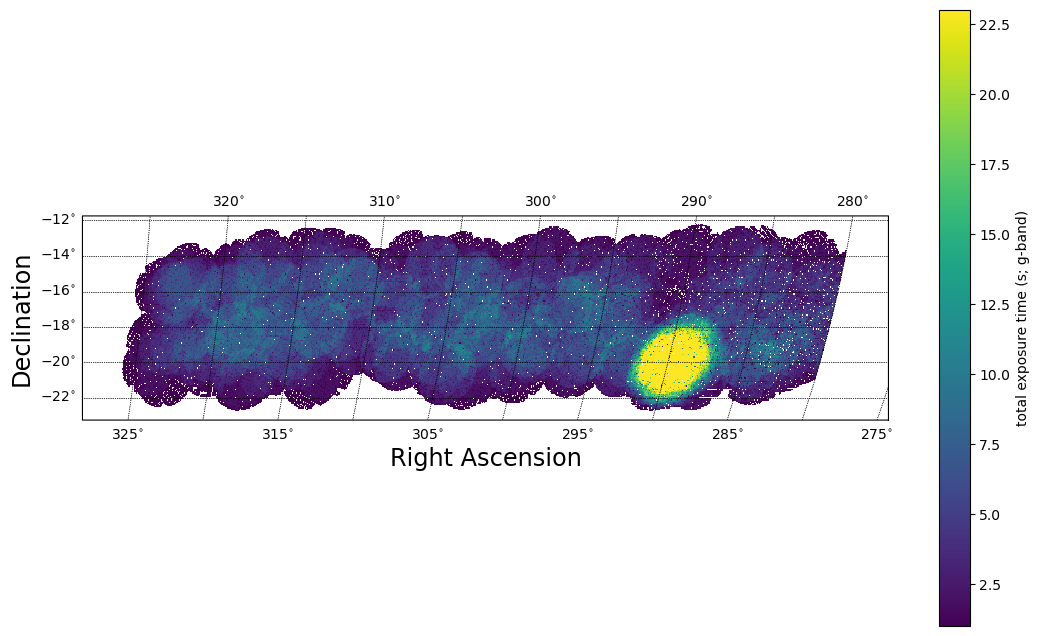

In [21]:
fig, ax = plt.subplots(figsize=(13, 8))
sp = skyproj.McBrydeSkyproj(ax=ax)
sp.draw_hspmap(exptime_map/30, lon_range=(280, 350))

# plt.xlabel("Right Ascension (deg)")
# plt.ylabel("Declination (deg)")
plt.colorbar(label="total exposure time (s; g-band)")
# plt.gca().invert_xaxis()

plt.show()